<a href="https://colab.research.google.com/github/tyin1001/Testing-Kepler-3rd-law/blob/main/Testing_Kepler's_3rd_Law_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Kepler's 3rd Law - Tuojin Yin

This project was part of the final project
for Dr. Masha Okounkova's Fall 2022 Physics 8A
class at PCC.

In [ ]:
# Obtain the necessary libraries 
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
# Read the data into python, and extract column #10 and #11 
# (the indices start from 0, not 1. This means that if we
# want columns 10 and 11 in the .DAT file, we must enter
# 9 and 10 in python). It returns a grid of values called
# "array".
cols9_10_org = np.genfromtxt("MPCORB (1).DAT", usecols=(9,10))
# The following two lines give the total number of rows of data 
# in the .DAT file. To run the line, delete the "#" at the
# beginning. This is used for the next step to see if we have 
# successively removed all the missing values.
num_lines = len(cols9_10_org)
print("There are {} rows in the file.".format(num_lines))

In [ ]:
# Some rows in the data file miss values (nan values). We don't want
# these rows so we remove them. 
# By np.isnan(), we can get an array based on the cols9_10_org array. 
# This function checks whether a value is missing (i.e. whether a 
# value is an nan value) and replaces missing values with True and 
# and the others with False.
# By np.isnan().any(axis=1), it gives us another array based on the 
# array returned by np.isnan(cols9_10_org). The function checks if 
# there're nan values across all columns in each row (axis=0). Rows 
# with missing values is signified in the new array as True.
# The negation sign "~" make rows with no missing values True. It 
# flips the Trues and Falses in the array returned by 
# np.isnan().any(axis=1)
# cols9_10_org[~np.isnan(cols9_10_org).any(axis=1), :] gets all the
# rows 
cols9_10 = cols9_10_org[~np.isnan(cols9_10_org).any(axis=1), :] 
# Obtain the number of rows to see if there're less rows after
# the above cutting and slicing
num_lines = len(cols9_10)
print("There are {} rows in the file.".format(num_lines))

In [ ]:
# slicing-get all rows in column 0 (mean daily motion (rad/day), used to get orbital period)
angular_v = cols9_10[:,0] 
# print(np.isnan(angular_v).any()) #check if there're any nan values
# print(angular_v)
# slicing-get all rows in column 1 (semimajor axis aka mean distance from the sun)
semi_major = cols9_10[:,1] 
# print(np.isnan(semi_major).any()) #check if there're any nan values
# print(semi_major)

In [ ]:
# print(len(semi_major), len(angular_v)) #check if the previous cells removes all rows with nan values in any column

In [ ]:
# compute periods from mean daily motion
T = (360/angular_v)/365
a = semi_major

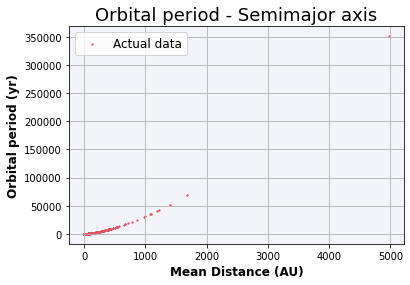

In [ ]:
# use matplotlib library to plot the data
plt.figure()
ax = plt.axes()
ax.set_facecolor("#f3f4f9")
plt.scatter(a, T, s=1.2, c="#e85064", marker="D", label="Actual data")
plt.title("Orbital period - Semimajor axis", font="Times New Roman", size=18)
plt.xlabel("Mean Distance (AU)", font="Times New Roman", size=12, fontweight='bold')
plt.ylabel("Orbital period (yr)", font="Times New Roman", size=12, fontweight='bold')
#plt.yscale("log")
#plt.xscale("log")
plt.grid()
plt.legend(prop={'family':"Times New Roman", 'size':12})
#plt.savefig("power-actual-1.png", bbox_inches="tight")
plt.show()

In [ ]:
# y = ax^b + c equation for power law model
def power_law_model(x, a, b, c):
    return a*x**b+c

In [ ]:
parameter, pcov = curve_fit(f=power_law_model, xdata=a, ydata=T)
coefficient = parameter[0]
power = parameter[1]
intercept = parameter[2]
print(parameter)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

In [ ]:
a_test = np.linspace(0, 5200, num=100)

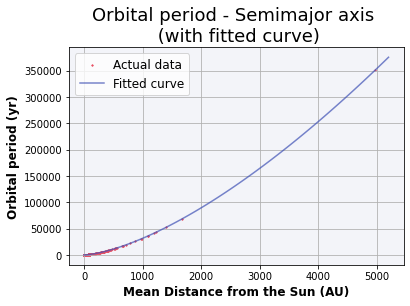

In [ ]:
fitted_curve = power_law_model(a_test, coefficient, power, intercept)
#print(fitted_curve)
plt.figure()
ax = plt.axes()
ax.set_facecolor("#f3f4f9")
plt.scatter(a, T, marker="D", s=1.2, c="#e85064", label="Actual data")
plt.plot(a_test, fitted_curve, c="#3f51b5b3", label="Fitted curve")
plt.title("Orbital period - Semimajor axis \n (with fitted curve)", font="Times New Roman", size=18)
plt.xlabel("Mean Distance from the Sun (AU)", font="Times New Roman", size=12, fontweight='bold')
plt.ylabel("Orbital period (yr)", font="Times New Roman", size=12, fontweight='bold')
plt.grid()
plt.legend(prop={'family':"Times New Roman", 'size':12})
plt.savefig("power-w_fitted-1.png", bbox_inches="tight")
plt.show()

In [ ]:
log_T = np.log(T)
log_a = np.log(a)

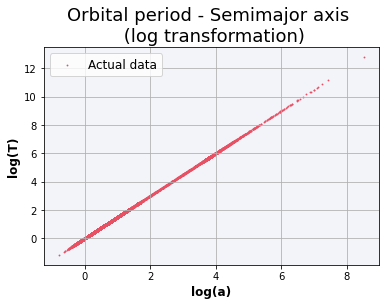

In [ ]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("#f3f4f9")
plt.scatter(log_a, log_T, s=0.7, c="#e85064", label="Actual data")
plt.title("Orbital period - Semimajor axis \n (log transformation)", font="Times New Roman", size=18)
plt.xlabel("log(a)", font="Times New Roman", size=12, fontweight='bold')
plt.ylabel("log(T)", font="Times New Roman", size=12, fontweight='bold')
plt.grid()
plt.legend(prop={'family':"Times New Roman", 'size':12})
#plt.savefig("linear-actual.png", bbox_inches="tight")
plt.show()

In [ ]:
def linear_model(x, m, n):
    return m*x+n

In [ ]:
parameter, pcov = curve_fit(f=linear_model, xdata=log_a, ydata=log_T)
coefficient_lin = parameter[0]
intercept_lin = parameter[1]

In [ ]:
log_a_test = np.linspace(-1, 9, num=50)

In [ ]:
fitted_line = linear_model(log_a_test, coefficient_lin, intercept_lin)

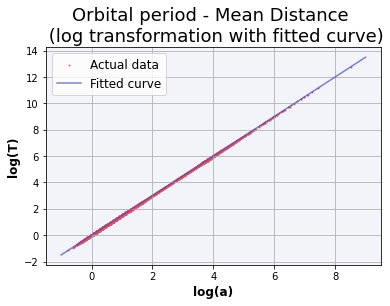

In [ ]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("#f3f4f9")
plt.scatter(log_a, log_T, s=0.7, c="#e85064", label="Actual data")
plt.title("Orbital period - Mean Distance \n (log transformation with fitted curve)", font="Times New Roman", size=18)
plt.plot(log_a_test, fitted_line, c="#3f51b5b3", label="Fitted curve")
plt.xlabel("log(a)", font="Times New Roman", size=12, fontweight='bold')
plt.ylabel("log(T)", font="Times New Roman", size=12, fontweight='bold')
plt.grid()
plt.legend(prop={'family':"Times New Roman", 'size':12})
plt.savefig("linear-w_fitted.png", bbox_inches="tight")
plt.show()